In [2]:
from copy import deepcopy

import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import logomaker

import bean as be
from bean import Edit
import bean.plotting.editing_patterns

In [3]:
plt.style.use('jr')
plt.rcParams["pdf.use14corefonts"] = True
matplotlib.rcParams['pdf.fonttype'] = 42 
matplotlib.rcParams["axes.unicode_minus"] = False

In [4]:
plt.style.use('default')

# Load and prepare ReporterScreen


## Tiling screen data

In [5]:
cdata = be.read_h5ad(f"../../results/filtered_annotated/LDLRCDS/bean_count_LDLRCDS_masked.h5ad")

In [6]:
cdata_bulk = cdata[:,cdata.samples.bin == "bulk"]

In [7]:
cdata_bulk_fs = cdata_bulk[:,~cdata_bulk.samples.rep.isin([f"rep{n}" for n in range(1,5)])]

In [8]:
cedit_rates_df = bean.plotting.editing_patterns.get_edit_rates(cdata_bulk_fs)

Calibrating edits in editable positions...:   0%|          | 0/7320 [00:00<?, ?it/s]

## Variant targeting screen

Guides in this data has designated target position at one of P3-8 with. We will use the target position editing efficiency for PAM preference and not for position-wise editing efficiency analyses.

In [9]:
vdata = be.read_h5ad(f"../../results/filtered_annotated/LDLvar/bean_count_LDLvar_masked.h5ad")

In [10]:
vdata_bulk = vdata[:, vdata.samples.bin == "bulk"]

In [11]:
vdata_bulk_fs = vdata_bulk[:,~vdata_bulk.samples.rep.isin([f"rep{n}" for n in range(1,5)])]

In [12]:
target_pos = vdata_bulk_fs.guides.loc[vdata_bulk_fs.uns['edit_counts'].guide, "target_pos"].reset_index(drop=True)

In [13]:
rel_pos = vdata_bulk_fs.uns['edit_counts'].edit.map(lambda e: e.rel_pos)

In [14]:
vdata_bulk_fs.uns['target_edit_counts'] = vdata_bulk_fs.uns['edit_counts'].loc[rel_pos == target_pos, :].reset_index(drop=True)

In [15]:
vedit_rates_df = be.pl.editing_patterns.get_edit_rates(vdata_bulk_fs, edit_count_key='target_edit_counts', add_absent=False)

<Axes: xlabel='Protospacer position', ylabel='A>G editing rate'>

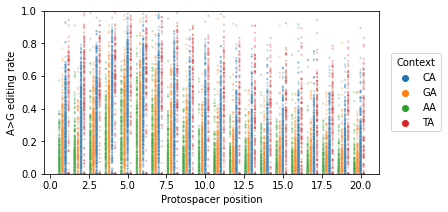

In [16]:
be.pl.editing_patterns.plot_by_pos_context(cedit_rates_df)

### BE-Hive like plotting


In [17]:
cedit_rates_df.spacer_pos = cedit_rates_df.spacer_pos.astype(int)

/data/pinello/PROJECTS/2021_08_ANBE/software/crispr-bean/bean/plotting/editing_patterns.py:192: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  edit_rates_df.groupby(["base_change", "spacer_pos"])


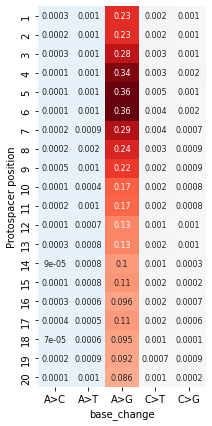

In [18]:
be.pl.editing_patterns.plot_by_pos_behive(
    cedit_rates_df,
    cdata_bulk_fs,
    target_basechange=cdata_bulk_fs.uns['target_base_change'], 
    nonref_base_changes = ["C>T", "C>G"]
)
plt.savefig("1b_pos_eff_behive_LDLRCDS.pdf", bbox_inches = 'tight')

/data/pinello/PROJECTS/2021_08_ANBE/software/crispr-bean/bean/plotting/editing_patterns.py:192: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  edit_rates_df.groupby(["base_change", "spacer_pos"])


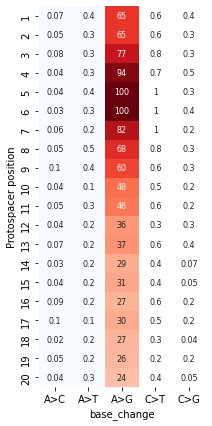

In [19]:
be.pl.editing_patterns.plot_by_pos_behive(
    cedit_rates_df,
    cdata_bulk_fs,
    target_basechange=cdata_bulk_fs.uns['target_base_change'], 
    nonref_base_changes = ["C>T", "C>G"],
    normalize=True
)
plt.savefig("1b_pos_eff_behive_LDLRCDS_normed.pdf", bbox_inches = 'tight')

## Combination with PAM


In [20]:
cedit_rates_df_ag = cedit_rates_df.loc[cedit_rates_df.base_change == "A>G",:].reset_index(drop=True)

/data/pinello/PROJECTS/2021_08_ANBE/software/crispr-bean/bean/plotting/editing_patterns.py:334: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  edit_rates_df.loc[(edit_rates_df.base_change == bdata.target_base_change)]


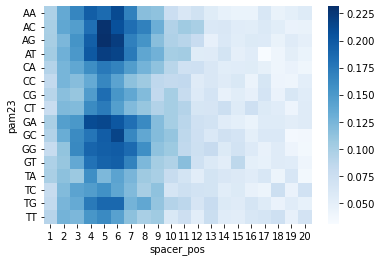

In [21]:
be.pl.editing_patterns.plot_by_pos_pam(cdata_bulk_fs, cedit_rates_df)
plt.savefig("1b_pos_by_pam_LDLRCDS.pdf", bbox_inches = 'tight')

In [36]:
cedit_rates_df_ag.spacer_pos.min()

1

In [37]:
cedit_rates_df_ag_P56=cedit_rates_df_ag.loc[cedit_rates_df_ag.spacer_pos.isin([5,6])]

In [38]:
cedit_rates_df_ag_P56

,guide,edit,rep_median,rep_mean,rel_pos,spacer_pos,base_change,context,spacer_pos_ctxt,pam,pam23,pam2,pam3,pam12,pam34
3,10_2511_neg,11224178:10:-:A>G,0.548077,0.597541,10,5,A>G,CA,5.0,CCTGC,CT,C,T,CC,TG
12,10_2517_neg,11224184:10:-:A>G,0.750000,0.775420,10,5,A>G,CA,5.0,ATCTC,TC,T,C,AT,CT
19,10_2520_pos,11224186:11:+:A>G,0.412533,0.417367,11,6,A>G,GA,5.8,CCTGC,CT,C,T,CC,TG
37,10_2526_neg,11224192:11:-:A>G,0.400174,0.381823,11,6,A>G,AA,5.6,GGAGC,GA,G,A,GG,AG
38,10_2526_neg,11224193:10:-:A>G,0.380174,0.389615,10,5,A>G,GA,4.8,GGAGC,GA,G,A,GG,AG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60740,Intron 1 DNaseHS 2_5698_pos,12:12:+:A>G,0.000000,0.000000,12,6,A>G,CA,6.0,ACCCA,CC,C,C,AC,CC
60747,Intron 1 DNaseHS 2_5701_neg,11:11:+:A>G,0.000000,0.000000,11,6,A>G,GA,5.8,TGATT,GA,G,A,TG,AT
60778,Intron 1 DNaseHS 2_5710_pos,11:11:+:A>G,0.000000,0.000000,11,5,A>G,AA,4.6,TGGAA,GG,G,G,TG,GA
60779,Intron 1 DNaseHS 2_5710_pos,12:12:+:A>G,0.000000,0.000000,12,6,A>G,AA,5.6,TGGAA,GG,G,G,TG,GA


In [42]:
edit_P56_by_pam = cedit_rates_df_ag_P56.groupby("pam23")["rep_mean"].mean()
print(edit_P56_by_pam.min())
print(edit_P56_by_pam.max())

0.13290678309664297
0.22597757611973543


In [41]:
cedit_rates_df_ag_P56.groupby("pam23")["rep_mean"].mean()

pam23
AA    0.197894
AC    0.215657
AG    0.225978
AT    0.218131
CA    0.171810
CC    0.152336
CG    0.168849
CT    0.158798
GA    0.207560
GC    0.206987
GG    0.195941
GT    0.193255
TA    0.132907
TC    0.147411
TG    0.188298
TT    0.151340
Name: rep_mean, dtype: float64

/data/pinello/PROJECTS/2021_08_ANBE/software/crispr-bean/bean/plotting/editing_patterns.py:334: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  edit_rates_df.loc[(edit_rates_df.base_change == bdata.target_base_change)]
/data/pinello/PROJECTS/2021_08_ANBE/software/crispr-bean/bean/plotting/editing_patterns.py:388: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  ax[1].set_xlabel("Protospacer position")


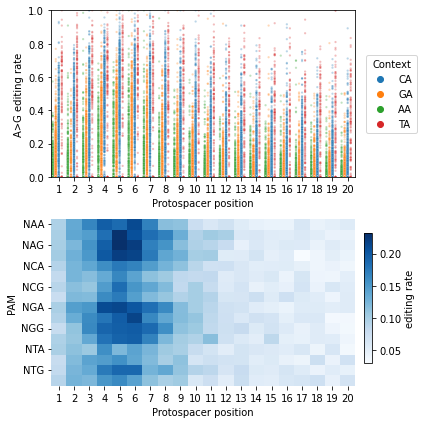

In [22]:
be.pl.editing_patterns.plot_by_pos_pam_and_context(cdata_bulk_fs, cedit_rates_df_ag)
plt.savefig("1b_pos_pam_and_context.pdf", bbox_inches = 'tight')

In [23]:
vedit_rates_df_ag = vedit_rates_df.loc[vedit_rates_df.base_change == "A>G",:].reset_index(drop=True)
cedit_rates_df_ag_window = cedit_rates_df_ag.loc[(cedit_rates_df_ag.spacer_pos >= 3) & (cedit_rates_df_ag.spacer_pos < 8)].copy()
all_rates = deepcopy(pd.concat([cedit_rates_df_ag_window, vedit_rates_df_ag]))

Normalizing per context mean


/data/pinello/PROJECTS/2021_08_ANBE/software/crispr-bean/bean/plotting/editing_patterns.py:419: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  window_edits["norm_rate"] = window_edits.rep_mean


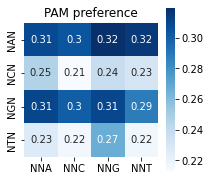

In [24]:
be.pl.editing_patterns.plot_pam_preference(all_rates)
plt.savefig("1b_pam_varcds_combined.pdf", bbox_inches='tight')

## Context preference logo


In [25]:
def info_content(v, background = 1):
    """Get information content-normalized v for 1d np.ndarry v"""
    return (2 + (v*np.log2(v/background)).sum())*v

In [26]:
cedit_rates_df_ag_window["context"] = cedit_rates_df_ag_window.apply(
    lambda row: cdata_bulk_fs.guides.loc[row.guide, "Reporter"][
        row.rel_pos - 1 : row.rel_pos + 2
    ],
    axis=1,
)

In [27]:
con_mean_er = {}
for i in range(3):
    cedit_rates_df_ag_window[f"context_{i}"] = cedit_rates_df_ag_window.context.map(lambda s: s[i])
    con_mean_er[i] = cedit_rates_df_ag_window.groupby(f"context_{i}")["rep_mean"].mean()

In [33]:
con_mean_er

{0: context_0
 A    0.094536
 C    0.208941
 G    0.133190
 T    0.281390
 Name: rep_mean, dtype: float64,
 1: context_1
 A    0.167352
 Name: rep_mean, dtype: float64,
 2: context_2
 A    0.140478
 C    0.185057
 G    0.164426
 T    0.174789
 Name: rep_mean, dtype: float64}

In [28]:
bg = con_mean_er[1]["A"]
context_0 = info_content(con_mean_er[0], background = bg)
context_2 = info_content(con_mean_er[2], background = bg)

In [29]:
ic_tbl = pd.concat([context_0, pd.DataFrame([2,0,0,0], index=["A", "C", "G", "T"]), context_2], axis=1).T
ic_tbl.index = [-1, 0, 1]

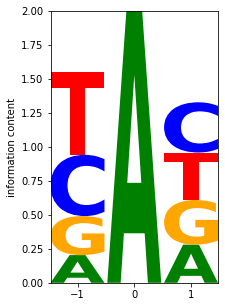

In [30]:
fig, ax = plt.subplots(figsize=(3,5))

logomaker.Logo(ic_tbl, ax = ax)
ax.set_ylabel("information content")
fig.savefig("context_preference_3_8.pdf")